## In this little python script I shorly repeat the main concepts behind the recession analysis

In [1]:
# Load additional packages (as nothing to do with hydrology :)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ipython modules
from IPython.display import Image

# set seaborn color and plotscheme 
sns.set_style("darkgrid")

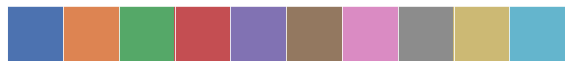

In [2]:
# display colors (to have nicer color schemes)
current_palette = sns.color_palette("deep")
sns.palplot(current_palette)

### Depuit-Boussinesq equation (e.g. Blume et al. 2007 check also the references in the past lectures):

## $Q=Q_O\,\,\,exp(-kt)$


### Valid only for a unconfined aquifer with a single driving head and without capillary effects 

### The recession constant controls how fast water can drain the hillslope (integral resisitance, friction etc.). 

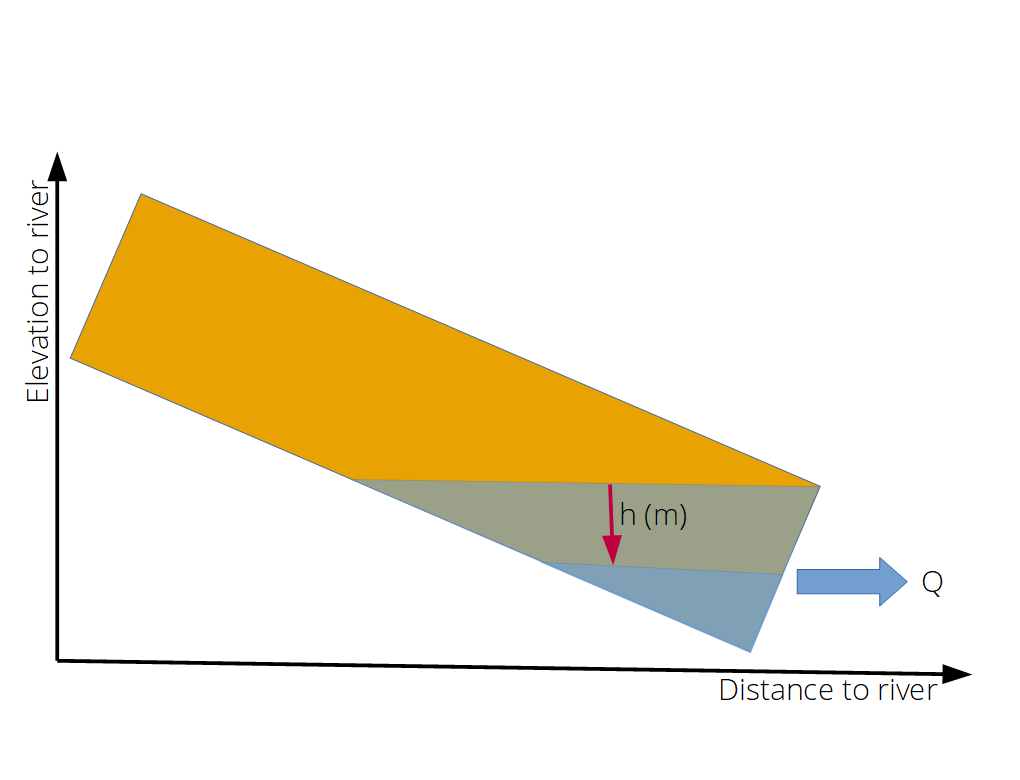

In [3]:
Image(filename='../plots/hillslope_one_layer_water_table.png')

In [4]:
# def recession function
def recession_function(var_t, var_Q_O, par_k):
    Q = var_Q_O * np.exp(-par_k*var_t)
    return(Q)

In [5]:
# def parameters and variables
t = np.linspace(1, 100, num=100) # set time (sec)
Q_O = 1 # set peak flow (m3 s-1)
k = 0.05 # set recession constant (s-1)

In [6]:
# run the recession model
Q = recession_function(var_t=t, var_Q_O=Q_O, par_k=k)

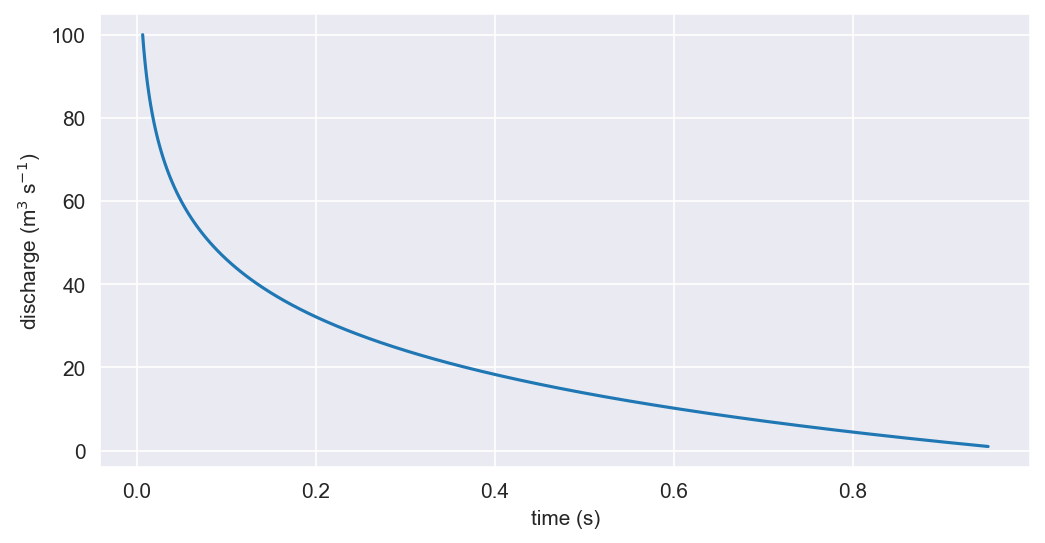

In [7]:
# plot recession
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(Q, t)
plt.ylabel("discharge (m$^{3}$ s$^{-1}$)")
plt.xlabel("time (s)")
plt.show()

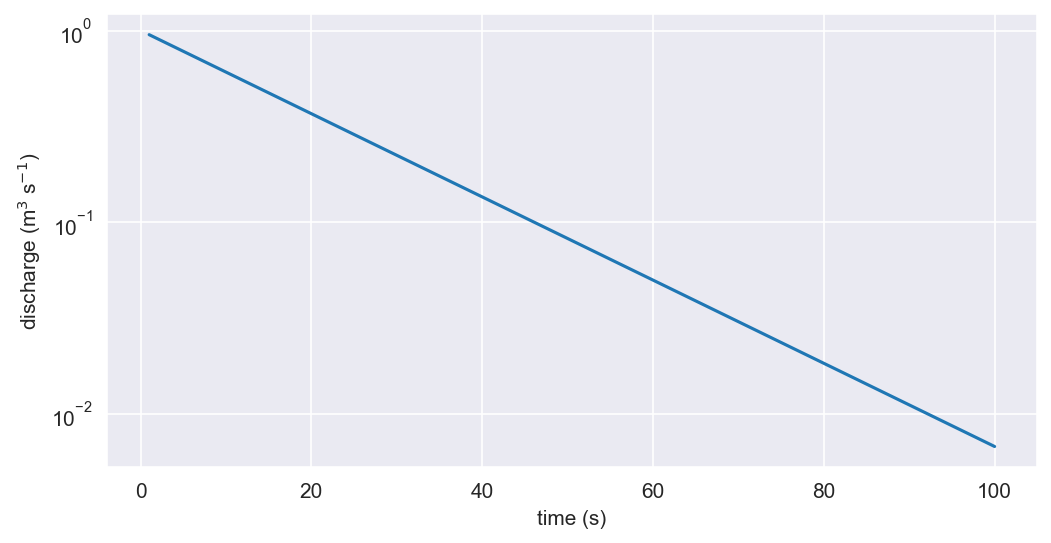

In [8]:
# plot recession in semilog space
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t,Q)
plt.yscale('log')
plt.ylabel("discharge (m$^{3}$ s$^{-1}$)")
plt.xlabel("time (s)")
plt.show()

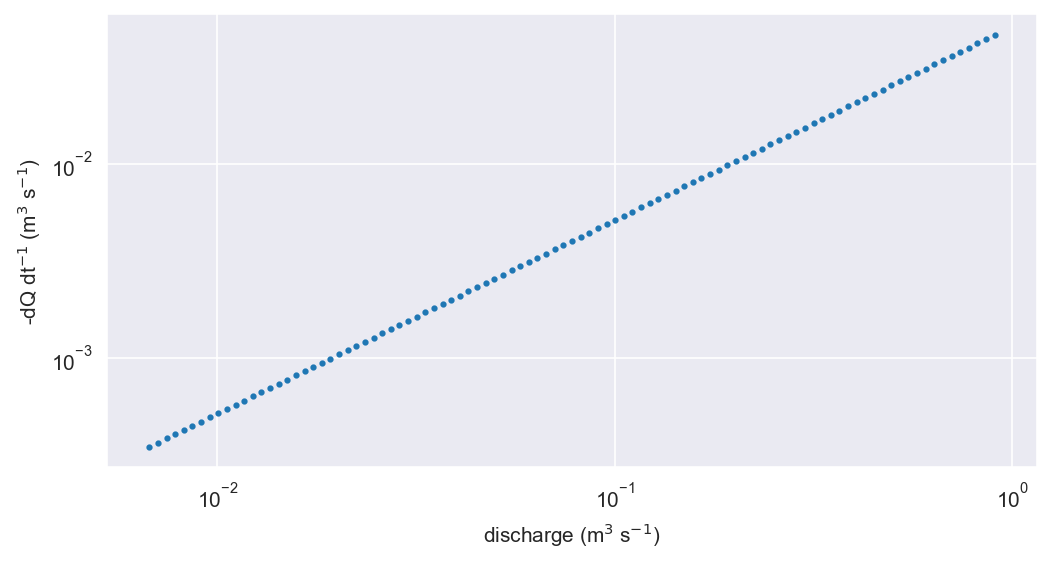

In [9]:
# plot a recession plot
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
plt.show()

## Inrease the complexity of the recession by changing k during the recession

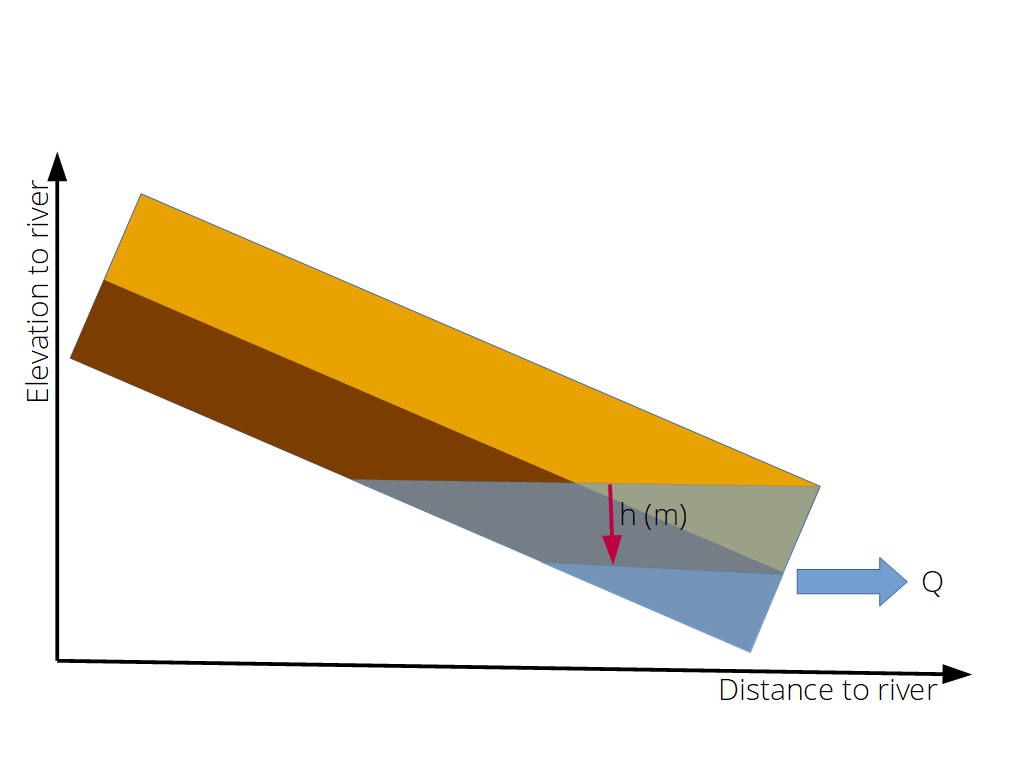

In [10]:
Image(filename='../plots/hillslope_two_layer_water_table.png')

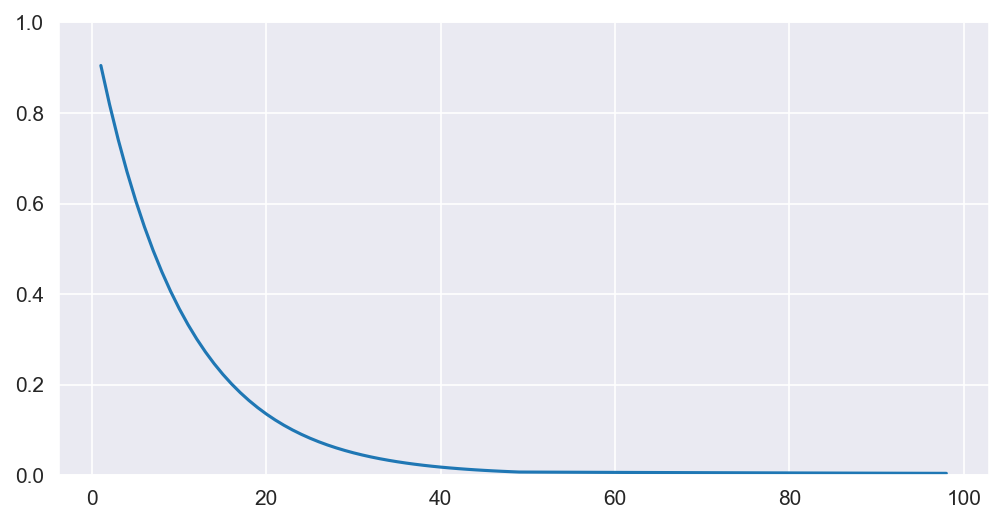

In [11]:
# change k after t1
t1 = t[0:49]

# change recession constant during recession
k1 = 0.1 # k1
k2 = 0.01 # k2

#------------------------------------------------
Q1 = 1 * np.exp(-k1 * t1)
Q2 = Q1[-1] * np.exp(-k2 * t1)
#------------------------------------------------

#------------------------------------------------
Q_total = np.hstack([Q1, Q2])
t_total = np.linspace(1,len(t1)*2,num=len(Q_total))

#------------------------------------------------
# plot figure
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t_total, Q_total)
plt.ylim([0,1])
plt.show()

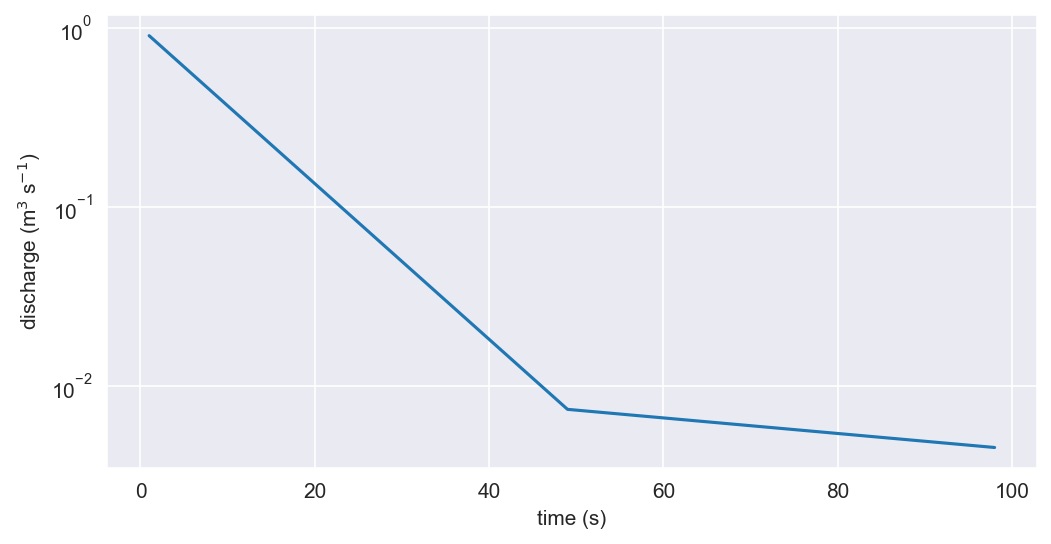

In [12]:
# plot recession in semilog space
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t_total,Q_total)
plt.yscale('log')
plt.ylabel("discharge (m$^{3}$ s$^{-1}$)")
plt.xlabel("time (s)")
plt.show()

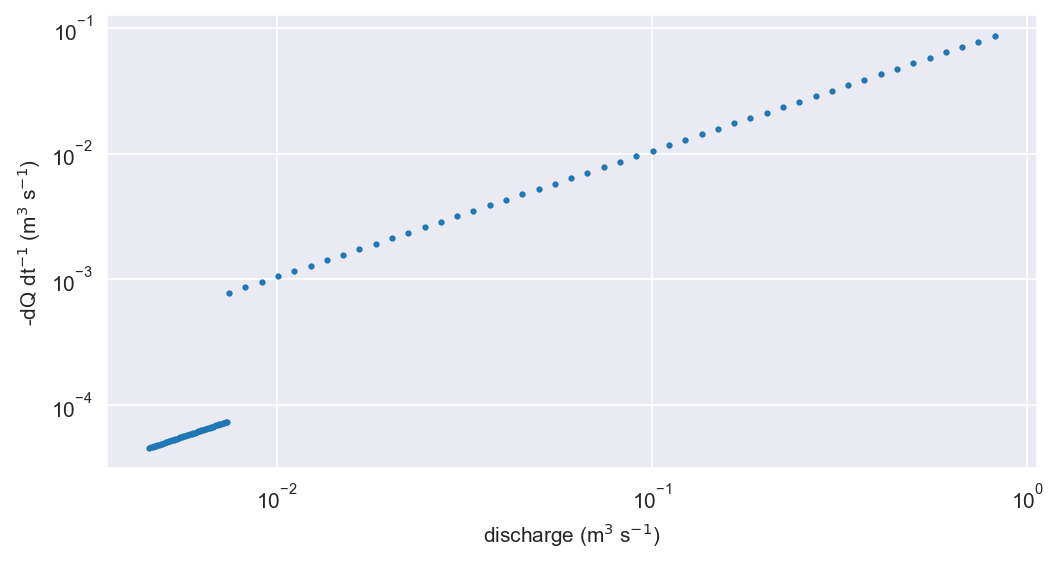

In [13]:
# plot a recession plot
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(Q_total[1:len(Q_total)], np.diff(Q_total)*-1, 'o', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
plt.show()

## Lets make things a bit more relasitic and varry the reccession constant in a certain range

## $Q=Q_O\,\,\,exp(- \color{red}kt)$

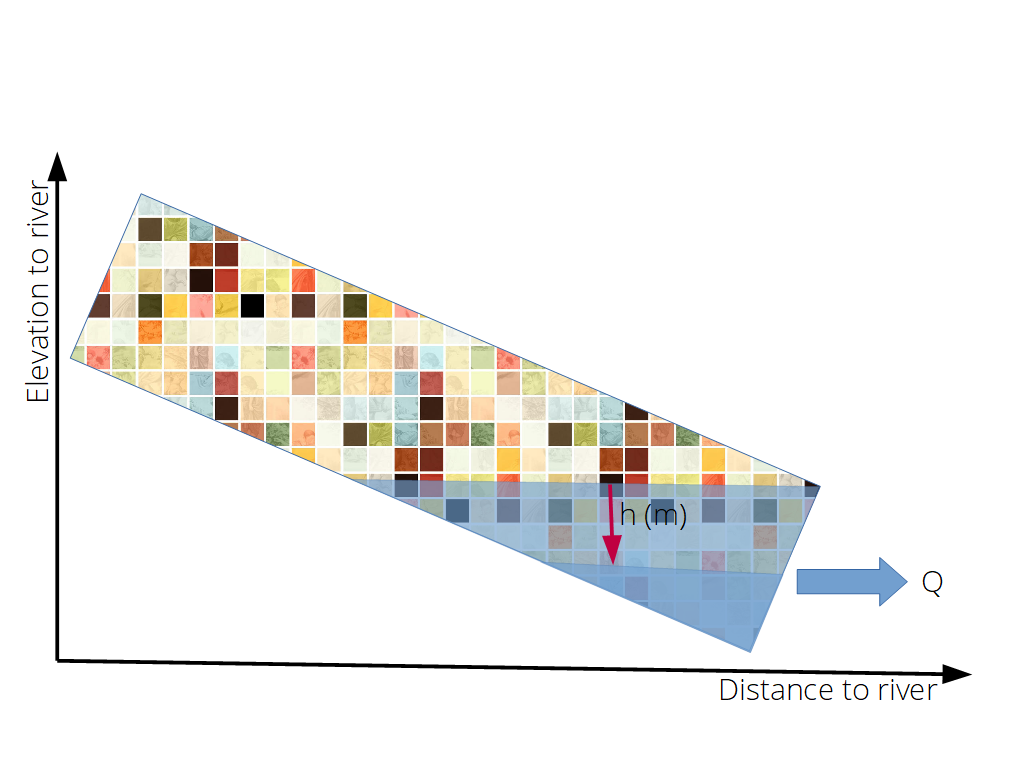

In [14]:
# the colorscheme of the hillslope is called tiled bath floor *fantastic
Image(filename='../plots/hillslope_mulit_layer_water_table.png')

In [15]:
# draw form a uniform distribution between 0.01 and 0.03 a 100 times
k = np.random.uniform(0.05, 0.1, 100)

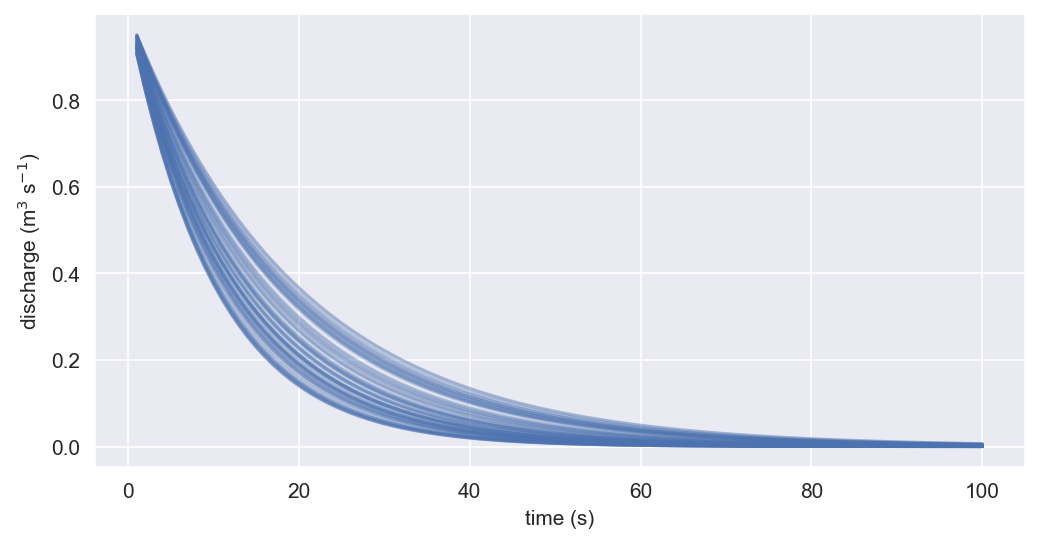

In [16]:
# plot the 100 recessions
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')

for i in range(0,99):
    # run the recession model
    Q = recession_function(var_t=t, var_Q_O=Q_O, par_k=k[i])
    plt.plot(t,Q, color=current_palette[0], alpha=0.2)
    plt.ylabel("discharge (m$^{3}$ s$^{-1}$)")
    plt.xlabel("time (s)")
plt.show()    

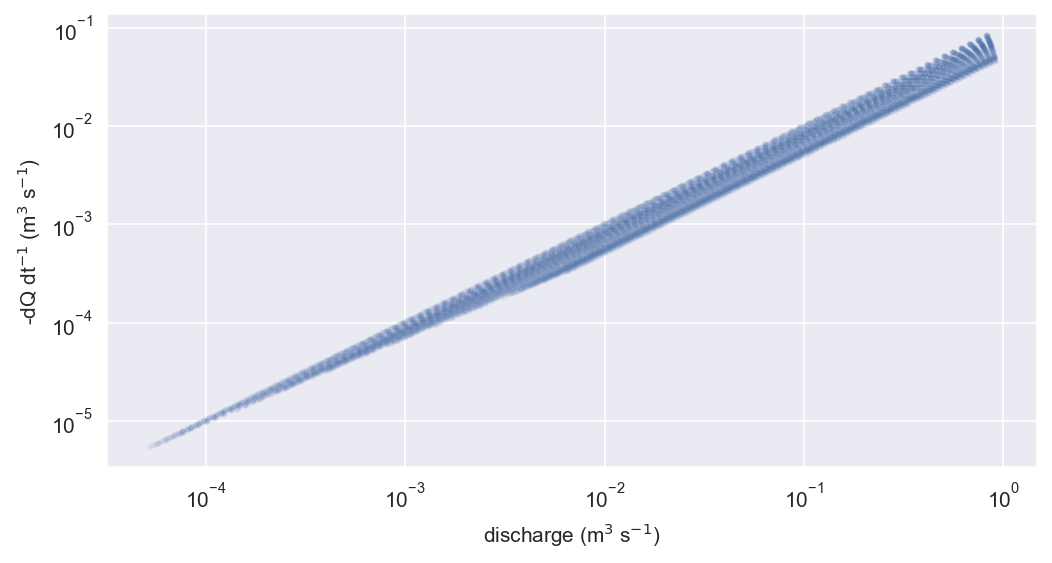

In [17]:
# plot recession plot
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')

for i in range(0,99):
    # run the recession model
    Q = recession_function(var_t=t, var_Q_O=Q_O, par_k=k[i])
    plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', color=current_palette[0], alpha=0.05, markersize=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
    plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
plt.show()   

## Not all runoff events have the same peak flow so lets randomly change $Q_0$
### and make thing even more realisitc by adding a bit of random noise (e.g. uncertainties in the rating curve)

In [18]:
# vary Q_O
Q_O = np.random.normal(0.3, 0.1, 100)

# def time variable
t = np.linspace(1, 50, num=100) # set time (sec)

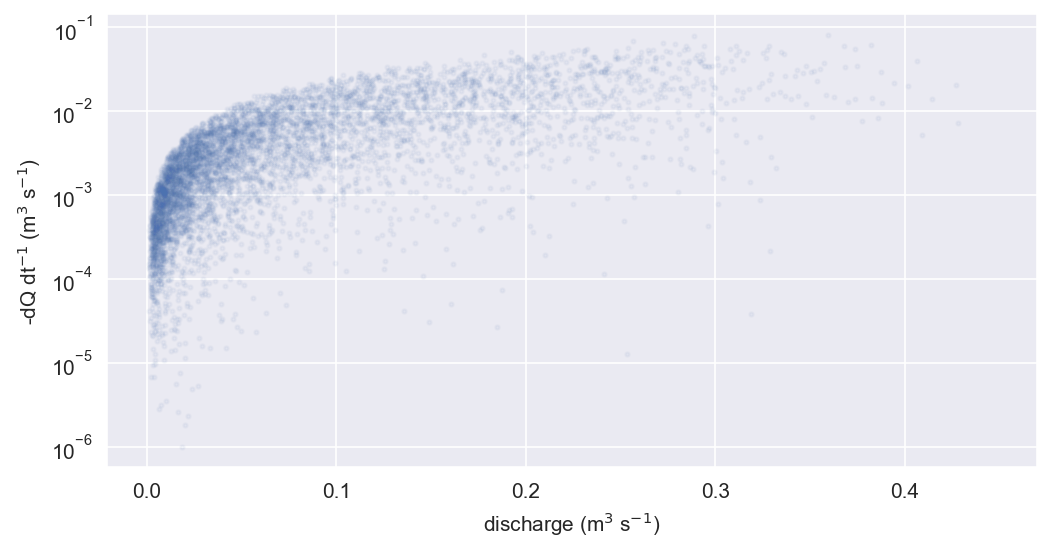

In [19]:
# plot recession
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')

for i in range(0,99):
    # run the recession model
    random_noise = np.random.uniform(0.9, 1.1, 100) # ADD random noise
    Q = recession_function(var_t=t, var_Q_O=Q_O[i], par_k=k[i])
    Q = Q * random_noise
    plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', color=current_palette[0], alpha=0.05, markersize=2)
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
    plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
plt.show() 

## compare to real real world data

In [20]:
# import the observed discharge from the schwebich catchment
tab_runo = pd.read_csv('d:/adaptive_modeling/data/discharge/tab_runo_obs.csv')
tab_runo.index = pd.to_datetime(tab_runo['date'], format='%Y-%m-%d %H:%M:%S')
tab_runo = tab_runo.drop(['date'], 1)
tab_schwebich = tab_runo['schwebich']

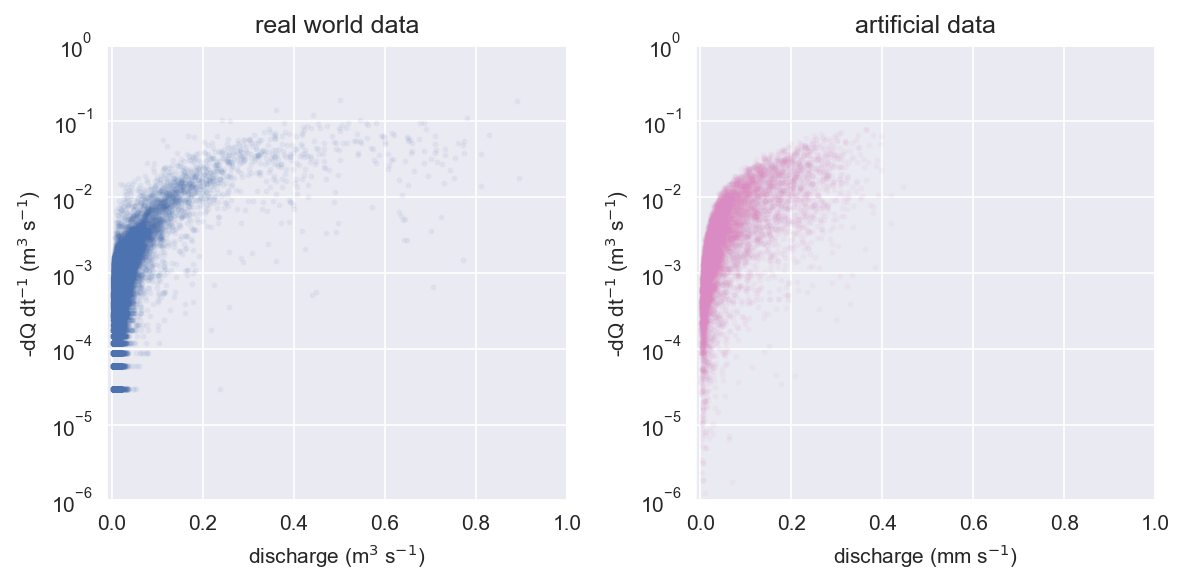

In [21]:
# plot real world data against artificial data
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')

#------------------------------------------------------------------------
plt.subplot(121)
plt.title('real world data')
plt.plot(tab_schwebich[1:len(tab_schwebich)], np.diff(tab_schwebich)*-1, 'o',
         color=current_palette[0], alpha=0.05, markersize=2)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
plt.ylim([1e-06, 1])
plt.xlim([-0.01, 1])

#------------------------------------------------------------------------
plt.subplot(122)
plt.title('artificial data')
for i in range(0,99):
    # run the recession model
    random_noise = np.random.uniform(0.9, 1.1, 100) # here we add a bit of random noise 
    Q = recession_function(var_t=t, var_Q_O=Q_O[i], par_k=k[i])
    Q = Q * random_noise
    plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', color=current_palette[6], alpha=0.05, markersize=2)
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
    plt.xlabel("discharge (mm s$^{-1}$)")
    plt.ylim([1e-06, 1])
    plt.xlim([-0.01, 1])

plt.tight_layout()

## fit a recession constant

## $Q=Q_O\,\,\,exp(-kt)$

In [22]:
# def parameters and variables
t = np.linspace(1, 100, num=100) # set time (sec)

# assume an average recession constant (so we simply take the mean of the randomly generated k values)
avg_k = np.mean(k)

print(avg_k)

0.07372073515593582


In [23]:
# run the recession model with the avg k value
Q_fitted = recession_function(var_t=t, var_Q_O=0.5, par_k=avg_k)

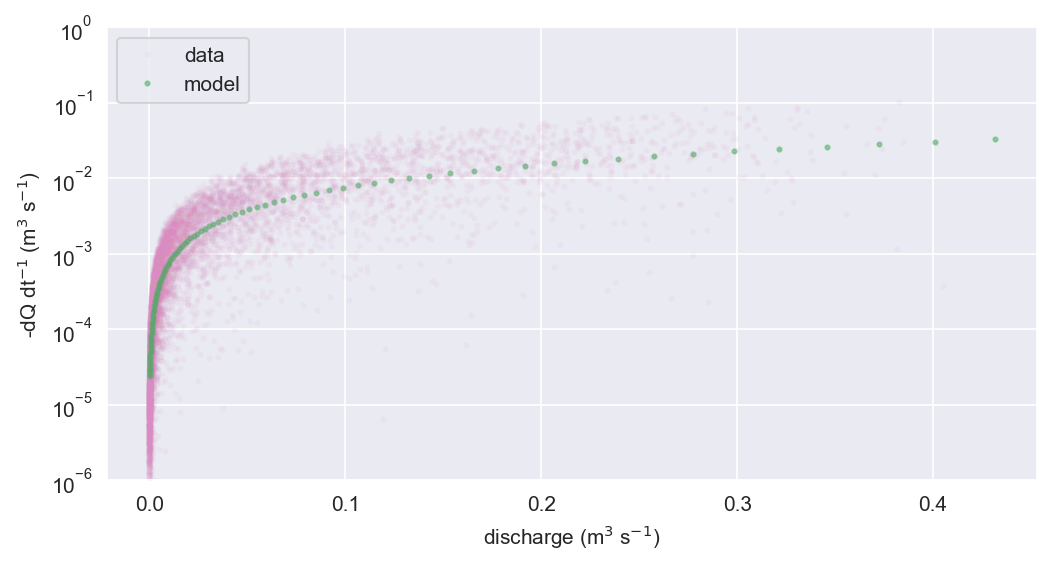

In [24]:
fig=plt.figure(figsize=(8,4), dpi= 150, facecolor='w', edgecolor='k')

for i in range(0,99):
    # run the recession model
    random_noise = np.random.uniform(0.9, 1.1, 100)
    Q = recession_function(var_t=t, var_Q_O=Q_O[i], par_k=k[i])
    Q = Q * random_noise
    plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', color=current_palette[6], alpha=0.05, markersize=2)
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("-dQ dt$^{-1}$ (m$^{3}$ s$^{-1}$)")
    plt.xlabel("discharge (m$^{3}$ s$^{-1}$)")
    plt.ylim([1e-06, 1])
    #plt.xlim([0, 1])

plt.plot(Q[1:len(Q)], np.diff(Q)*-1, 'o', color=current_palette[8], alpha=0.05, markersize=2, label='data')
plt.plot(Q_fitted[1:len(Q_fitted)], np.diff(Q_fitted)*-1, 'o', color=current_palette[2], alpha=0.5, markersize=2, label='model')
plt.legend()
plt.show()

## Beta store

In [26]:
P = 100
beta = 0.01
S = 1
S_max = 10

In [27]:
def beta_store(P, S, S_max, beta):
    print(P*(S/S_max)**beta)

In [28]:
beta_store(P, S, S_max, beta)

97.72372209558107


In [29]:
P = 100
beta = 4
S = 1
S_max = 10

In [30]:
beta_store(P, S, S_max, beta)

0.010000000000000002
